In [1]:
!pip install wordcloud
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mou_1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

pip uninstall nltk

In [2]:
survey = pd.read_csv(r'Post PandemicPsychologyCaseStudy.csv',encoding='latin-1',header=None)
survey.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Timestamp,What grade are you in?,What gender do you identify with?,Rate your school year in terms of mental healt...,What was your hardest class at school this year?,Why was that class the hardest for you? What d...,What is one thing you wish you did differently...,How do you think teachers could have been more...,What do YOU think would have helped you be mor...,Do you think you had sufficient support from y...,Do you think you had sufficient support from y...,Which of these options do you think would have...,Anything else you would like to share (for exa...,What was your average screen time this year in...,What was the average time that you slept every...,Last question! Share something interesting abo...,NaN,0.0
1,6/6/2021 13:43,Middle School,Male,2,English,Keeping up with deadlines,Paid attention,What was helpful was the teachers being more l...,Paying more attention,No,Yes,"Going to a therapist, Getting help for betteri...",Nope,8,7 hours,I hate myself,NaN,NaN
2,6/15/2021 13:25,12th,Female,5,AP Calc,The teacher went over content quickly and onli...,Managed my time better and prioritized certain...,It would have been helpful if they had taken i...,A different courseload than the one I original...,Yes,Yes,"Getting help for bettering my sleep schedule, ...",I think taking tests became significantly hard...,Around 7 hours,6 hours,My favorite hobby currently is reading!,NaN,NaN
3,6/15/2021 13:28,12th,Female,3,None,I struggled with getting all my work done on t...,I wish I was more organized and did a better j...,I wish they would have cut us more slack or at...,Less tests. I have no idea why tests were give...,Yes,No,Being able to talk with others more (Senior su...,I was way more anxious! I was never really ner...,around 8 hours per day.,6 hours,I love chocolate but I hate chocolate donuts. ...,NaN,NaN
4,6/15/2021 13:28,12th,Female,8,Honors Physics,"The concepts were harder to understand, especi...",I wish I asked more questions.,I think if teachers had gone a bit slower in l...,If teachers were a bit more sensitive to the s...,No,Yes,Being able to talk with others more (Senior su...,I was pretty much the same in terms of success...,10 hours because of attending school and doing...,7 hours,My best friend is the researcher conducting th...,NaN,NaN
5,6/15/2021 14:00,12th,Female,5,ap physics,"i donât like science, and the material was h...",studied more instead of slacking off just hes ...,my teachers were really nice given the circums...,better study guides because most of the learni...,Yes,Yes,Reducing how much time I spent on social media,no,8,9 hours,"i love to paint, favorite artist is bts",NaN,NaN
6,6/15/2021 15:25,10th,Male,2,Health,Health,Eat more poop,Stupid,Mama Mia,Yes,No,Wow,I like meat,10,4 hours,Is a cake,NaN,NaN
7,6/15/2021 15:26,11th,Female,2,AP Bio,Excessive amount of work/deadlines,"Less procrastination, finding ways to make the...","Reduce the amount of work, thereâs no need f...","Mindfulness/Reflection Time\nHomework breaks, ...",No,Yes,Being able to talk with others more (Senior su...,Definitely more anxious/anxiety attacks\nAlso ...,16,5 hours,"Currently watching Glee, itâs pretty good!",NaN,NaN
8,6/15/2021 15:42,11th,Female,4,AP Chem or HPC,"Concepts were hard, hard to ask for help",I wish I bought a proper chair earlier in the ...,"Offer study sessions for questions, be more re...",Being kinder to myself. I beat myslef up and I...,Yes,No,"Going to a therapist, Getting help for betteri...",Definitely more anxious,6 hours,9 hours,I love Taylor swift,NaN,NaN
9,6/15/2021 21:23,11th,Female,8,AP Calc,Itâs hard to learn math online,Ate better,some helped by lightening workload,More focus,Yes,No,Being able to talk with others more (Senior su...,N/a,"4hours on phone, probably 17 hours in total",6 hours,found a love for podcasts recently!,NaN,NaN


In [4]:
survey.shape

(42, 18)

In [3]:

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop = stopwords.words('english')
punc = string.punctuation
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mou_1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mou_1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mou_1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
#notes = survey[0]
#survey.drop(notes, axis =1, inplace=True)
survey.columns = ["Time","Geade_Level", "Gender","MentalHEalth_ScaleRating_CurrentSchoolYear","HardestClass","WhyHardestClass","WishDifferentForRemortLearning","TeacherHelpful","HowSuccessRemortLerning","FamilySupport","FriendSupport","HoeToBetterMentalHealth","LevelOfAnxious","DailyScreenTime","DailySleepTime","InterestingAboutYourself","Null","0"]
survey.head(10)

,Time,Geade_Level,Gender,MentalHEalth_ScaleRating_CurrentSchoolYear,HardestClass,WhyHardestClass,WishDifferentForRemortLearning,TeacherHelpful,HowSuccessRemortLerning,FamilySupport,FriendSupport,HoeToBetterMentalHealth,LevelOfAnxious,DailyScreenTime,DailySleepTime,InterestingAboutYourself,Null,0
0,Timestamp,What grade are you in?,What gender do you identify with?,Rate your school year in terms of mental healt...,What was your hardest class at school this year?,Why was that class the hardest for you? What d...,What is one thing you wish you did differently...,How do you think teachers could have been more...,What do YOU think would have helped you be mor...,Do you think you had sufficient support from y...,Do you think you had sufficient support from y...,Which of these options do you think would have...,Anything else you would like to share (for exa...,What was your average screen time this year in...,What was the average time that you slept every...,Last question! Share something interesting abo...,NaN,0.0
1,6/6/2021 13:43,Middle School,Male,2,English,Keeping up with deadlines,Paid attention,What was helpful was the teachers being more l...,Paying more attention,No,Yes,"Going to a therapist, Getting help for betteri...",Nope,8,7 hours,I hate myself,NaN,NaN
2,6/15/2021 13:25,12th,Female,5,AP Calc,The teacher went over content quickly and onli...,Managed my time better and prioritized certain...,It would have been helpful if they had taken i...,A different courseload than the one I original...,Yes,Yes,"Getting help for bettering my sleep schedule, ...",I think taking tests became significantly hard...,Around 7 hours,6 hours,My favorite hobby currently is reading!,NaN,NaN
3,6/15/2021 13:28,12th,Female,3,None,I struggled with getting all my work done on t...,I wish I was more organized and did a better j...,I wish they would have cut us more slack or at...,Less tests. I have no idea why tests were give...,Yes,No,Being able to talk with others more (Senior su...,I was way more anxious! I was never really ner...,around 8 hours per day.,6 hours,I love chocolate but I hate chocolate donuts. ...,NaN,NaN
4,6/15/2021 13:28,12th,Female,8,Honors Physics,"The concepts were harder to understand, especi...",I wish I asked more questions.,I think if teachers had gone a bit slower in l...,If teachers were a bit more sensitive to the s...,No,Yes,Being able to talk with others more (Senior su...,I was pretty much the same in terms of success...,10 hours because of attending school and doing...,7 hours,My best friend is the researcher conducting th...,NaN,NaN
5,6/15/2021 14:00,12th,Female,5,ap physics,"i donât like science, and the material was h...",studied more instead of slacking off just hes ...,my teachers were really nice given the circums...,better study guides because most of the learni...,Yes,Yes,Reducing how much time I spent on social media,no,8,9 hours,"i love to paint, favorite artist is bts",NaN,NaN
6,6/15/2021 15:25,10th,Male,2,Health,Health,Eat more poop,Stupid,Mama Mia,Yes,No,Wow,I like meat,10,4 hours,Is a cake,NaN,NaN
7,6/15/2021 15:26,11th,Female,2,AP Bio,Excessive amount of work/deadlines,"Less procrastination, finding ways to make the...","Reduce the amount of work, thereâs no need f...","Mindfulness/Reflection Time\nHomework breaks, ...",No,Yes,Being able to talk with others more (Senior su...,Definitely more anxious/anxiety attacks\nAlso ...,16,5 hours,"Currently watching Glee, itâs pretty good!",NaN,NaN
8,6/15/2021 15:42,11th,Female,4,AP Chem or HPC,"Concepts were hard, hard to ask for help",I wish I bought a proper chair earlier in the ...,"Offer study sessions for questions, be more re...",Being kinder to myself. I beat myslef up and I...,Yes,No,"Going to a therapist, Getting help for betteri...",Definitely more anxious,6 hours,9 hours,I love Taylor swift,NaN,NaN
9,6/15/2021 21:23,11th,Female,8,AP Calc,Itâs hard to learn math online,Ate better,some helped by lightening workload,More focus,Yes,No,Being able to ta

In [5]:
notes = survey[['Time','Null','0']]
survey.drop(notes, axis =1, inplace=True)


In [6]:
survey.head()

,Geade_Level,Gender,MentalHEalth_ScaleRating_CurrentSchoolYear,HardestClass,WhyHardestClass,WishDifferentForRemortLearning,TeacherHelpful,HowSuccessRemortLerning,FamilySupport,FriendSupport,HoeToBetterMentalHealth,LevelOfAnxious,DailyScreenTime,DailySleepTime,InterestingAboutYourself
0,What grade are you in?,What gender do you identify with?,Rate your school year in terms of mental healt...,What was your hardest class at school this year?,Why was that class the hardest for you? What d...,What is one thing you wish you did differently...,How do you think teachers could have been more...,What do YOU think would have helped you be mor...,Do you think you had sufficient support from y...,Do you think you had sufficient support from y...,Which of these options do you think would have...,Anything else you would like to share (for exa...,What was your average screen time this year in...,What was the average time that you slept every...,Last question! Share something interesting abo...
1,Middle School,Male,2,English,Keeping up with deadlines,Paid attention,What was helpful was the teachers being more l...,Paying more attention,No,Yes,"Going to a therapist, Getting help for betteri...",Nope,8,7 hours,I hate myself
2,12th,Female,5,AP Calc,The teacher went over content quickly and onli...,Managed my time better and prioritized certain...,It would have been helpful if they had taken i...,A different courseload than the one I original...,Yes,Yes,"Getting help for bettering my sleep schedule, ...",I think taking tests became significantly hard...,Around 7 hours,6 hours,My favorite hobby currently is reading!
3,12th,Female,3,None,I struggled with getting all my work done on t...,I wish I was more organized and did a better j...,I wish they would have cut us more slack or at...,Less tests. I have no idea why tests were give...,Yes,No,Being able to talk with others more (Senior su...,I was way more anxious! I was never really ner...,around 8 hours per day.,6 hours,I love chocolate but I hate chocolate donuts. ...
4,12th,Female,8,Honors Physics,"The concepts were harder to understand, especi...",I wish I asked more questions.,I think if teachers had gone a bit slower in l...,If teachers were a bit more sensitive to the s...,No,Yes,Being able to talk with others more (Senior su...,I was pretty much the same in terms of success...,10 hours because of attending school and doing...,7 hours,My best friend is the researcher conducting th...


In [7]:
survey = survey.iloc[1: , :]
survey.head(5)

,Geade_Level,Gender,MentalHEalth_ScaleRating_CurrentSchoolYear,HardestClass,WhyHardestClass,WishDifferentForRemortLearning,TeacherHelpful,HowSuccessRemortLerning,FamilySupport,FriendSupport,HoeToBetterMentalHealth,LevelOfAnxious,DailyScreenTime,DailySleepTime,InterestingAboutYourself
1,Middle School,Male,2,English,Keeping up with deadlines,Paid attention,What was helpful was the teachers being more l...,Paying more attention,No,Yes,"Going to a therapist, Getting help for betteri...",Nope,8,7 hours,I hate myself
2,12th,Female,5,AP Calc,The teacher went over content quickly and onli...,Managed my time better and prioritized certain...,It would have been helpful if they had taken i...,A different courseload than the one I original...,Yes,Yes,"Getting help for bettering my sleep schedule, ...",I think taking tests became significantly hard...,Around 7 hours,6 hours,My favorite hobby currently is reading!
3,12th,Female,3,None,I struggled with getting all my work done on t...,I wish I was more organized and did a better j...,I wish they would have cut us more slack or at...,Less tests. I have no idea why tests were give...,Yes,No,Being able to talk with others more (Senior su...,I was way more anxious! I was never really ner...,around 8 hours per day.,6 hours,I love chocolate but I hate chocolate donuts. ...
4,12th,Female,8,Honors Physics,"The concepts were harder to understand, especi...",I wish I asked more questions.,I think if teachers had gone a bit slower in l...,If teachers were a bit more sensitive to the s...,No,Yes,Being able to talk with others more (Senior su...,I was pretty much the same in terms of success...,10 hours because of attending school and doing...,7 hours,My best friend is the researcher conducting th...
5,12th,Female,5,ap physics,"i donât like science, and the material was h...",studied more instead of slacking off just hes ...,my teachers were really nice given the circums...,better study guides because most of the learni...,Yes,Yes,Reducing how much time I spent on social media,no,8,9 hours,"i love to paint, favorite artist is bts"


In [8]:
# Lowercasing
survey['HardestClass'] = survey['HardestClass'].str.lower()


In [9]:
survey.head(5)

,Geade_Level,Gender,MentalHEalth_ScaleRating_CurrentSchoolYear,HardestClass,WhyHardestClass,WishDifferentForRemortLearning,TeacherHelpful,HowSuccessRemortLerning,FamilySupport,FriendSupport,HoeToBetterMentalHealth,LevelOfAnxious,DailyScreenTime,DailySleepTime,InterestingAboutYourself
1,Middle School,Male,2,english,Keeping up with deadlines,Paid attention,What was helpful was the teachers being more l...,Paying more attention,No,Yes,"Going to a therapist, Getting help for betteri...",Nope,8,7 hours,I hate myself
2,12th,Female,5,ap calc,The teacher went over content quickly and onli...,Managed my time better and prioritized certain...,It would have been helpful if they had taken i...,A different courseload than the one I original...,Yes,Yes,"Getting help for bettering my sleep schedule, ...",I think taking tests became significantly hard...,Around 7 hours,6 hours,My favorite hobby currently is reading!
3,12th,Female,3,none,I struggled with getting all my work done on t...,I wish I was more organized and did a better j...,I wish they would have cut us more slack or at...,Less tests. I have no idea why tests were give...,Yes,No,Being able to talk with others more (Senior su...,I was way more anxious! I was never really ner...,around 8 hours per day.,6 hours,I love chocolate but I hate chocolate donuts. ...
4,12th,Female,8,honors physics,"The concepts were harder to understand, especi...",I wish I asked more questions.,I think if teachers had gone a bit slower in l...,If teachers were a bit more sensitive to the s...,No,Yes,Being able to talk with others more (Senior su...,I was pretty much the same in terms of success...,10 hours because of attending school and doing...,7 hours,My best friend is the researcher conducting th...
5,12th,Female,5,ap physics,"i donât like science, and the material was h...",studied more instead of slacking off just hes ...,my teachers were really nice given the circums...,better study guides because most of the learni...,Yes,Yes,Reducing how much time I spent on social media,no,8,9 hours,"i love to paint, favorite artist is bts"


In [10]:
LevelOfAnxious_counts = survey.LevelOfAnxious.value_counts()
print(LevelOfAnxious_counts)

Anxious                                                                                                                                                                                                                                                                                                                                                         6
Playing Game                                                                                                                                                                                                                                                                                                                                                    2
no                                                                                                                                                                                                                                                                                                  

In [11]:
surveys = survey.drop(['Geade_Level','Gender','HardestClass', 'WhyHardestClass','WishDifferentForRemortLearning','TeacherHelpful','HowSuccessRemortLerning','FamilySupport','FriendSupport','HoeToBetterMentalHealth','DailyScreenTime','DailySleepTime','InterestingAboutYourself'], axis=1)

encoded_data = surveys

In [12]:
surveys.head(5)

,MentalHEalth_ScaleRating_CurrentSchoolYear,LevelOfAnxious
1,2,Nope
2,5,I think taking tests became significantly hard...
3,3,I was way more anxious! I was never really ner...
4,8,I was pretty much the same in terms of success...
5,5,no


In [13]:
labels_to_MentalHEalth_ScaleRating_CurrentSchoolYear = {1-5:"Negative", 6-10:"Positive"}
def label_decoder(label):
    return labels_to_MentalHEalth_ScaleRating_CurrentSchoolYear[label]
    encoded_data.MentalHEalth_ScaleRating_CurrentSchoolYear = encoded_data.MentalHEalth_ScaleRating_CurrentSchoolYear.apply(lambda x: label_decoder(x))
encoded_data.head(5)

,MentalHEalth_ScaleRating_CurrentSchoolYear,LevelOfAnxious
1,2,Nope
2,5,I think taking tests became significantly hard...
3,3,I was way more anxious! I was never really ner...
4,8,I was pretty much the same in terms of success...
5,5,no


Text(0.5, 1.0, 'SRVUSD Students Survey Sentiment Data Distribution')

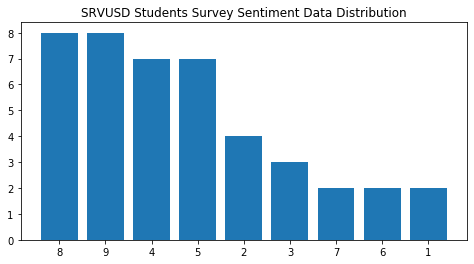

In [14]:
val_count = encoded_data.MentalHEalth_ScaleRating_CurrentSchoolYear.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("SRVUSD Students Survey Sentiment Data Distribution")

In [15]:
reduced_data = encoded_data
reduced_data.head(5)

,MentalHEalth_ScaleRating_CurrentSchoolYear,LevelOfAnxious
1,2,Nope
2,5,I think taking tests became significantly hard...
3,3,I was way more anxious! I was never really ner...
4,8,I was pretty much the same in terms of success...
5,5,no


In [16]:
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 1 to 43
Data columns (total 2 columns):
MentalHEalth_ScaleRating_CurrentSchoolYear    43 non-null object
LevelOfAnxious                                43 non-null object
dtypes: object(2)
memory usage: 820.0+ bytes


In [17]:
reduced_data['MentalHEalth_ScaleRating_CurrentSchoolYear']=pd.to_numeric(reduced_data['MentalHEalth_ScaleRating_CurrentSchoolYear'])
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 1 to 43
Data columns (total 2 columns):
MentalHEalth_ScaleRating_CurrentSchoolYear    43 non-null int64
LevelOfAnxious                                43 non-null object
dtypes: int64(1), object(1)
memory usage: 820.0+ bytes


In [18]:
data_positive = reduced_data[reduced_data['MentalHEalth_ScaleRating_CurrentSchoolYear'] >= 6]
data_negative = reduced_data[reduced_data['MentalHEalth_ScaleRating_CurrentSchoolYear'] <= 5]
print(len(data_positive), len(data_negative))

20 23


In [19]:
reduced_data = pd.concat([data_positive, data_negative])
len(reduced_data)

43

In [20]:
cleaned_data = reduced_data
cleaned_data.head(5)

,MentalHEalth_ScaleRating_CurrentSchoolYear,LevelOfAnxious
4,8,I was pretty much the same in terms of success...
9,8,N/a
12,8,I often stressed out a lot over small things l...
13,6,"Yes, this year I was more anxious then normal"
17,9,nope


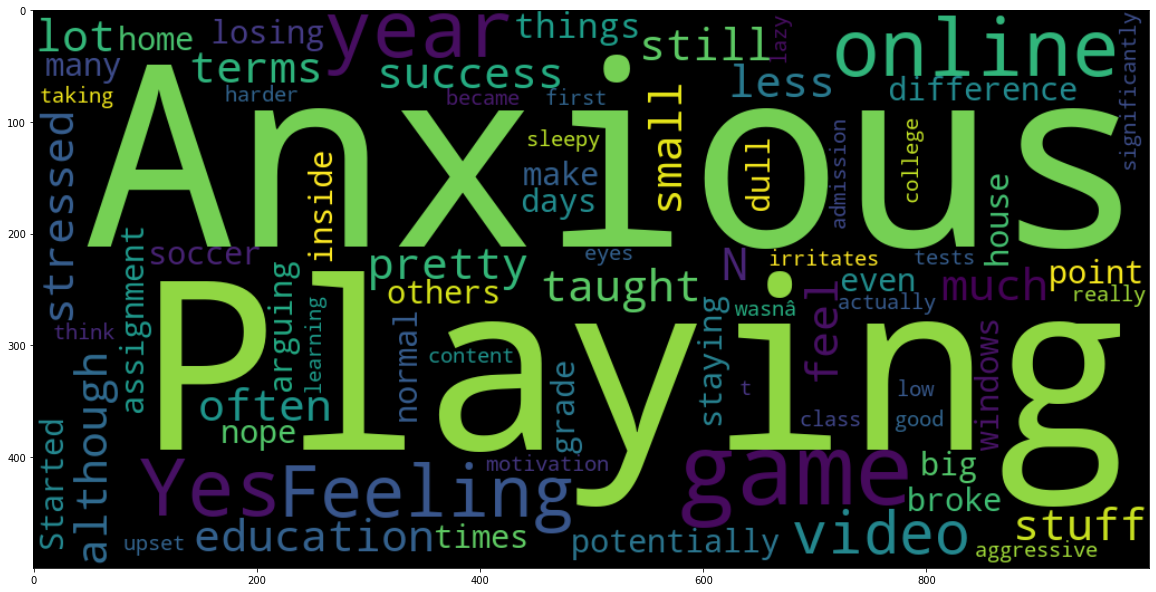

In [21]:
plt.figure(figsize = (20,20)) 
Positive_WC = WordCloud(max_words = 1000 , width = 1000 , height = 500).generate(" ".join(cleaned_data[cleaned_data.MentalHEalth_ScaleRating_CurrentSchoolYear >= 5].LevelOfAnxious))
plt.imshow(Positive_WC , interpolation = 'bilinear')